In [1]:
# 📘 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [3]:
# 📘 Step 2: Load the dataset
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')  # Latin1 fixes encoding issues

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
# 📘 Step 3: Explore dataset structure
print("\nDataset Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nUnique columns (for reference):")
print(df.columns.tolist())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-n

In [7]:
# 📘 Step 4: Select relevant numeric features for clustering
# Example: 'SALES', 'QUANTITYORDERED', 'PRICEEACH'
num_cols = ['SALES', 'QUANTITYORDERED', 'PRICEEACH']

# Keep only numeric features and drop missing values
data = df[num_cols].dropna()

print("Selected numeric columns for clustering:", num_cols)
print("Shape after dropping NaN:", data.shape)
data.head()


Selected numeric columns for clustering: ['SALES', 'QUANTITYORDERED', 'PRICEEACH']
Shape after dropping NaN: (2823, 3)


,SALES,QUANTITYORDERED,PRICEEACH
0,2871.00,30,95.70
1,2765.90,34,81.35
2,3884.34,41,94.74
3,3746.70,45,83.26
4,5205.27,49,100.00


In [9]:
# 📘 Step 5: Standardize (Normalize) the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print("✅ Data normalized successfully!")


✅ Data normalized successfully!


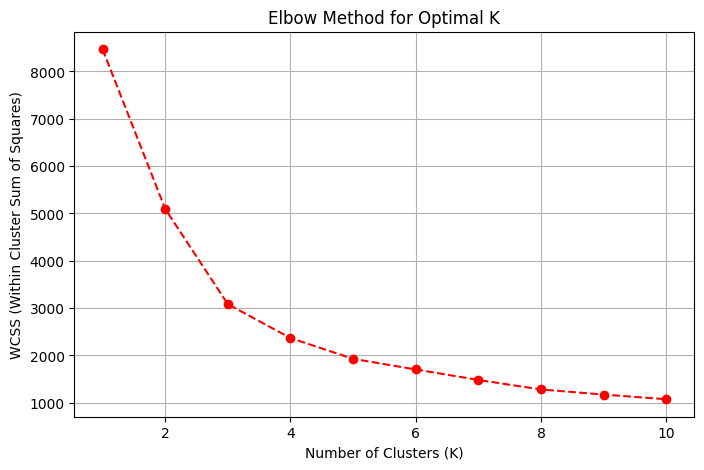

In [11]:
# 📘 Step 6: Determine the optimal number of clusters (Elbow Method)
wcss = []  # Within Cluster Sum of Squares

for k in range(1, 11):  # Try 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='dashed', color='red')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.grid(True)
plt.show()


In [13]:
# 📘 Step 7: Apply K-Means Clustering with optimal K (example: k=4)
k_optimal = 4  # Adjust based on elbow observation

kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to original data
data['Cluster'] = clusters
print("✅ K-Means clustering applied successfully!")
data.head()


✅ K-Means clustering applied successfully!


,SALES,QUANTITYORDERED,PRICEEACH,Cluster
0,2871.00,30,95.70,3
1,2765.90,34,81.35,3
2,3884.34,41,94.74,1
3,3746.70,45,83.26,0
4,5205.27,49,100.00,1


In [15]:
# 📘 Step 8: Analyze Cluster Characteristics
cluster_summary = data.groupby('Cluster')[num_cols].mean()
print("\n--- Cluster Summary (Mean Values) ---")
print(cluster_summary)



--- Cluster Summary (Mean Values) ---
               SALES  QUANTITYORDERED  PRICEEACH
Cluster                                         
0        2848.445822        43.754253  65.380699
1        5945.238037        43.845127  99.089252
2        1583.572297        28.021700  57.211374
3        3222.885323        27.807460  96.497923


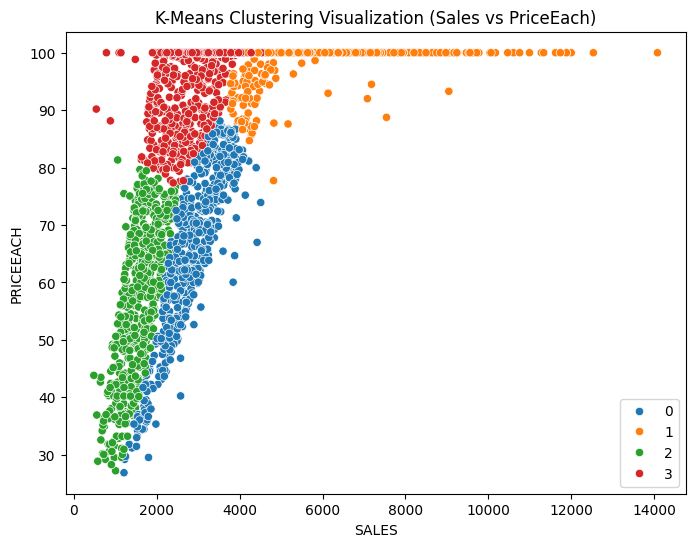

In [17]:
# 📘 Step 9: Visualize Clusters (Pair Plot)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='SALES', y='PRICEEACH', 
    hue='Cluster', palette='tab10', data=data
)
plt.title("K-Means Clustering Visualization (Sales vs PriceEach)")
plt.xlabel("SALES")
plt.ylabel("PRICEEACH")
plt.legend()
plt.show()


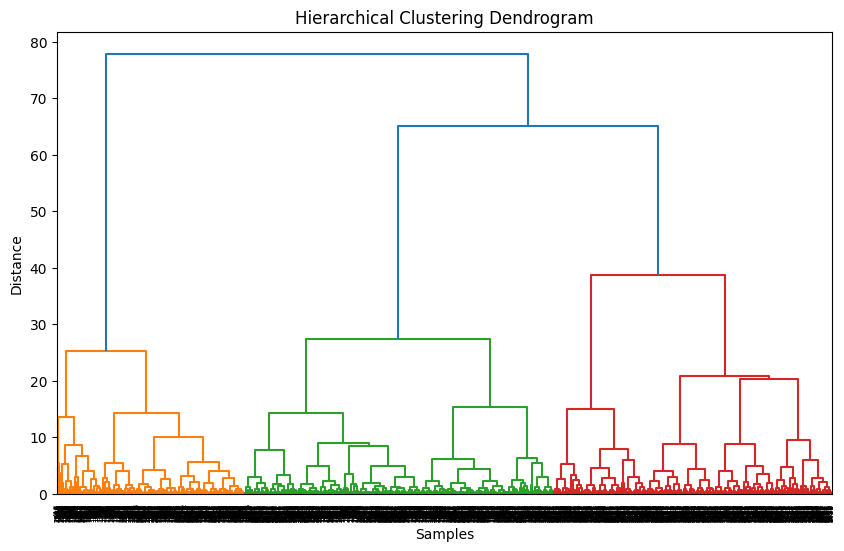

In [19]:
# 📘 Step 10 (Optional): Hierarchical Clustering for Comparison
linked = linkage(data_scaled, method='ward')  # Ward’s method minimizes variance
plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [21]:
# 📘 Step 11 (Optional): Cut the dendrogram into clusters
num_clusters = 4  # Based on elbow or visual cut
labels_h = fcluster(linked, num_clusters, criterion='maxclust')

data['HCluster'] = labels_h
print("✅ Hierarchical clustering labels added.")
data.head()


✅ Hierarchical clustering labels added.


,SALES,QUANTITYORDERED,PRICEEACH,Cluster,HCluster
0,2871.00,30,95.70,3,2
1,2765.90,34,81.35,3,2
2,3884.34,41,94.74,1,1
3,3746.70,45,83.26,0,3
4,5205.27,49,100.00,1,1
